# 1. Introduction
This comprehensive exploratory data analysis (EDA) covers individual analyses of the Customers, Products, and Transactions datasets, followed by an integrated analysis after merging them. The goal is to uncover meaningful insights.

# 2. Data Loading and Preprocessing
We begin by importing necessary libraries and loading each dataset into a Pandas DataFrame.

In [76]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting styles
sns.set_style('whitegrid')
%matplotlib inline

# 2.1 Customers Dataset

In [79]:
# Load Customers dataset
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')
# Convert 'SignupDate' to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')

# 3. Individual Dataset Analysis


## 3.1 EDA on Customers Dataset

In [80]:
# Display first few rows
print("First 5 rows of Customers dataset:")
display(customers.head())

First 5 rows of Customers dataset:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


## 3.1.2 Data Summary

In [81]:
# Summary statistics
print("Summary statistics of Customers dataset:")
display(customers.describe(include='all'))

Summary statistics of Customers dataset:


,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,NaN
top,C0001,Lawrence Carroll,South America,NaN
freq,1,1,59,NaN
mean,NaN,NaN,NaN,2023-07-19 08:31:12
min,NaN,NaN,NaN,2022-01-22 00:00:00
25%,NaN,NaN,NaN,2022-09-26 12:00:00
50%,NaN,NaN,NaN,2023-08-31 12:00:00
75%,NaN,NaN,NaN,2024-04-12 12:00:00
max,NaN,NaN,NaN,2024-12-28 00:00:00


## 3.1.3 Missing Values

In [82]:
# Check for missing values
print("Missing values in Customers dataset:")
print(customers.isnull().sum())

Missing values in Customers dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


Insight: If there are missing values, we need to handle them appropriately.

## 3.1.4 Data Types

In [83]:
# Check data types
print("Data types in Customers dataset:")
print(customers.dtypes)

Data types in Customers dataset:
CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object


Insight: Ensure that 'SignupDate' is datetime.

## 3.1.5 Handling Duplicates

In [84]:
# Check for duplicates
duplicate_customers = customers.duplicated(subset='CustomerID').sum()
print(f"Number of duplicate CustomerIDs: {duplicate_customers}")

Number of duplicate CustomerIDs: 0


Insight: No duplicates in 'CustomerID' is crucial for accurate analysis.

## 3.1.6 Exploratory Analysis

### 3.1.6.1 Customer Distribution by Region

In [85]:
# Customers per region
region_counts = customers['Region'].value_counts()
print(region_counts)

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


Visualization:

C:\Users\palut\AppData\Local\Temp\ipykernel_8940\2606566652.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=customers, order=region_counts.index, palette='viridis')


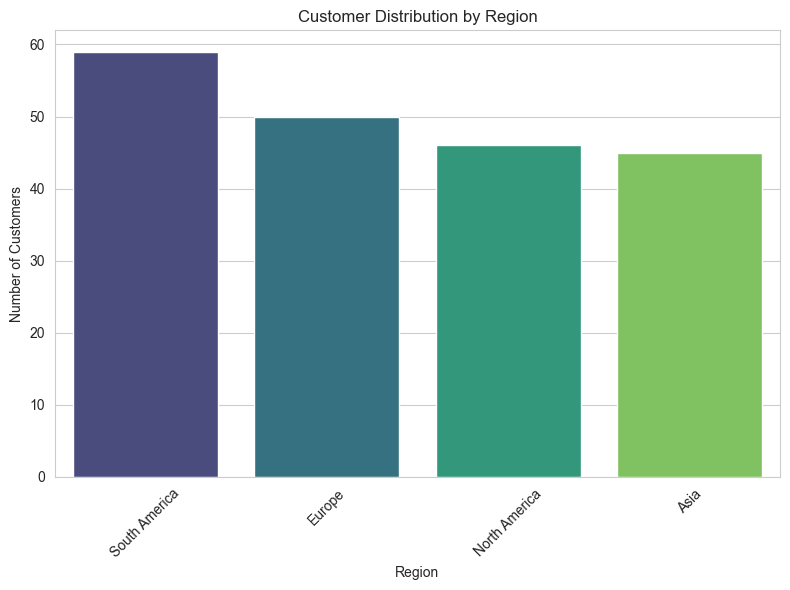

In [86]:
# Bar chart of customers per region
plt.figure(figsize=(8,6))
sns.countplot(x='Region', data=customers, order=region_counts.index, palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insight:
### South America has the highest number of customers.
### The company has a global presence.

### 3.1.6.2 Customer Sign-Ups Over Time


In [87]:
# Extract year and month from 'SignupDate'
customers['SignupYear'] = customers['SignupDate'].dt.year
customers['SignupMonth'] = customers['SignupDate'].dt.month

# Sign-ups by year
signups_by_year = customers['SignupYear'].value_counts().sort_index()
print(signups_by_year)

SignupYear
2022    64
2023    57
2024    79
Name: count, dtype: int64


### Visualization:

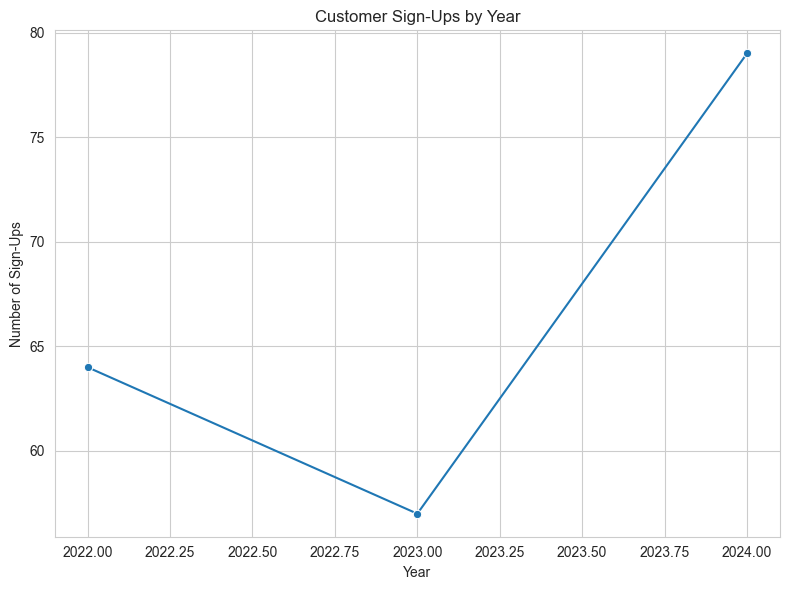

In [88]:
# Line chart of sign-ups by year
plt.figure(figsize=(8,6))
sns.lineplot(x=signups_by_year.index, y=signups_by_year.values, marker='o')
plt.title('Customer Sign-Ups by Year')
plt.xlabel('Year')
plt.ylabel('Number of Sign-Ups')
plt.grid(True)
plt.tight_layout()
plt.show()

### Insight:
### Sign-ups have increased over the years, indicating growth.

### 3.1.6.3 Monthly Sign-Up Trends

In [89]:
# Sign-ups by month (aggregated over all years)
signups_by_month = customers['SignupMonth'].value_counts().sort_index()
print(signups_by_month)

SignupMonth
1     15
2     21
3     20
4     24
5     17
6     12
7     13
8     10
9     21
10    15
11    19
12    13
Name: count, dtype: int64


### Visualization:

C:\Users\palut\AppData\Local\Temp\ipykernel_8940\369505073.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=signups_by_month.index-1, y=signups_by_month.values, palette='viridis')


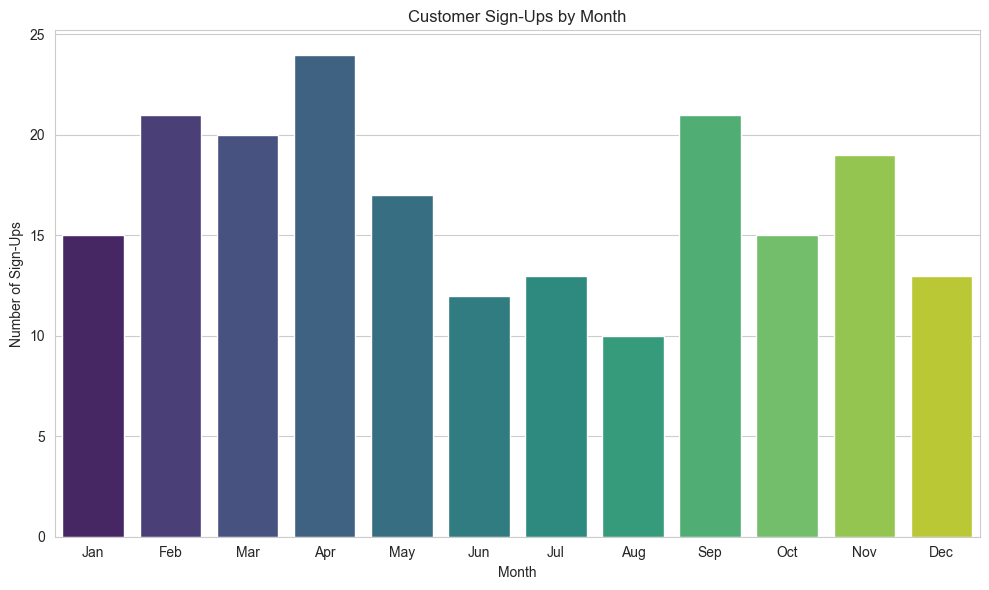

In [90]:
# Bar chart of sign-ups by month
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10,6))
sns.barplot(x=signups_by_month.index-1, y=signups_by_month.values, palette='viridis')
plt.title('Customer Sign-Ups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sign-Ups')
plt.xticks(ticks=range(12), labels=months)
plt.tight_layout()
plt.show()

### Insight:
### April has highest number of sign-ups
### December has the low sign-ups, promotions at time will help.

### 3.1.6.4 Customer Tenure

In [91]:
# Calculate customer tenure in days
today = customers['SignupDate'].max()
customers['TenureDays'] = (today - customers['SignupDate']).dt.days

# Summary statistics of tenure
print(customers['TenureDays'].describe())

count     200.000000
mean      527.645000
std       325.526568
min         0.000000
25%       259.500000
50%       484.500000
75%       823.500000
max      1071.000000
Name: TenureDays, dtype: float64


In [92]:
# Calculate customer tenure in days
today = customers['SignupDate'].max()
customers['TenureDays'] = (today - customers['SignupDate']).dt.days

# Summary statistics of tenure
print(customers['TenureDays'].describe())

count     200.000000
mean      527.645000
std       325.526568
min         0.000000
25%       259.500000
50%       484.500000
75%       823.500000
max      1071.000000
Name: TenureDays, dtype: float64


### Visualization:

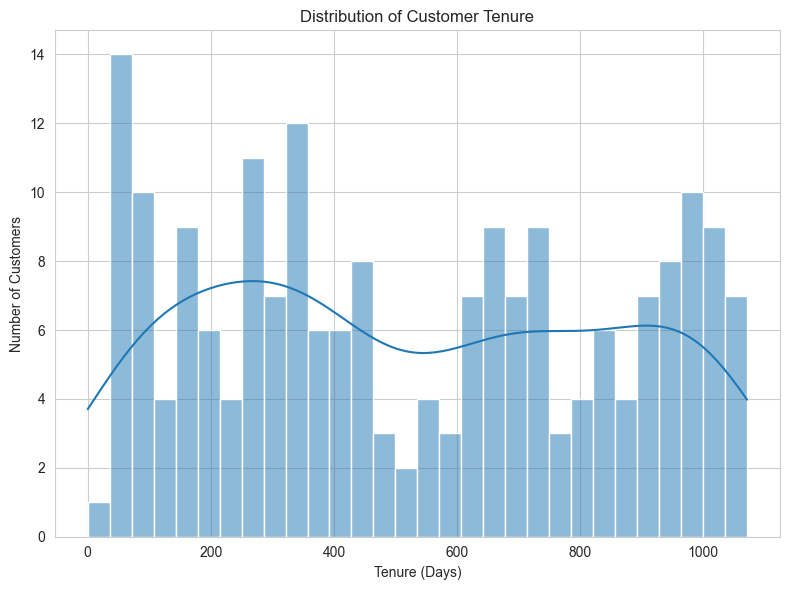

In [93]:
# Histogram of customer tenure
plt.figure(figsize=(8,6))
sns.histplot(customers['TenureDays'], bins=30, kde=True)
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Days)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

### Insight:

### Most customers have been with the company for a moderate duration.
### Opportunities exist to enhance customer retention.

## 3.1.7 Feature Engineering

### 3.1.7.2 Customer Segmentation

### We can segment customers based on region, tenure, or signup period.


### Segmentation by Region:

In [94]:
# Group by region and get mean tenure
region_tenure = customers.groupby('Region')['TenureDays'].mean()
print(region_tenure)

Region
Asia             519.933333
Europe           548.080000
North America    422.217391
South America    598.406780
Name: TenureDays, dtype: float64


### Insight:
### Understand regions with more loyal customers.

### 3.2 EDA on Products Dataset

### 3.2.1 Data Overview

In [95]:
# Display first few rows
print("First 5 rows of Products dataset:")
display(products.head())

First 5 rows of Products dataset:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


### 3.2.2 Data Summary

In [96]:
# Summary statistics
print("Summary statistics of Products dataset:")
display(products.describe(include='all'))

Summary statistics of Products dataset:


,ProductID,ProductName,Category,Price
count,100,100,100,100.000000
unique,100,66,4,NaN
top,P001,ActiveWear Smartwatch,Books,NaN
freq,1,4,26,NaN
mean,NaN,NaN,NaN,267.551700
std,NaN,NaN,NaN,143.219383
min,NaN,NaN,NaN,16.080000
25%,NaN,NaN,NaN,147.767500
50%,NaN,NaN,NaN,292.875000
75%,NaN,NaN,NaN,397.090000


### 3.2.3 Missing Values

In [97]:
# Check for missing values
print("Missing values in Products dataset:")
print(products.isnull().sum())

Missing values in Products dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


### Insight: Ensure data is complete for accurate analysis.

### 3.2.4 Data Types

In [98]:
# Check data types
print("Data types in Products dataset:")
print(products.dtypes)

Data types in Products dataset:
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object


### 3.2.5 Handling Duplicates

In [99]:
# Check for duplicates
duplicate_products = products.duplicated(subset='ProductID').sum()
print(f"Number of duplicate ProductIDs: {duplicate_products}")

Number of duplicate ProductIDs: 0


Insight: Unique ProductIDs are essential.

3.2.6 Exploratory Analysis

### 3.2.6.1 Products per Category

In [100]:
# Number of products per category
category_counts = products['Category'].value_counts()
print(category_counts)

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


### Visualization:

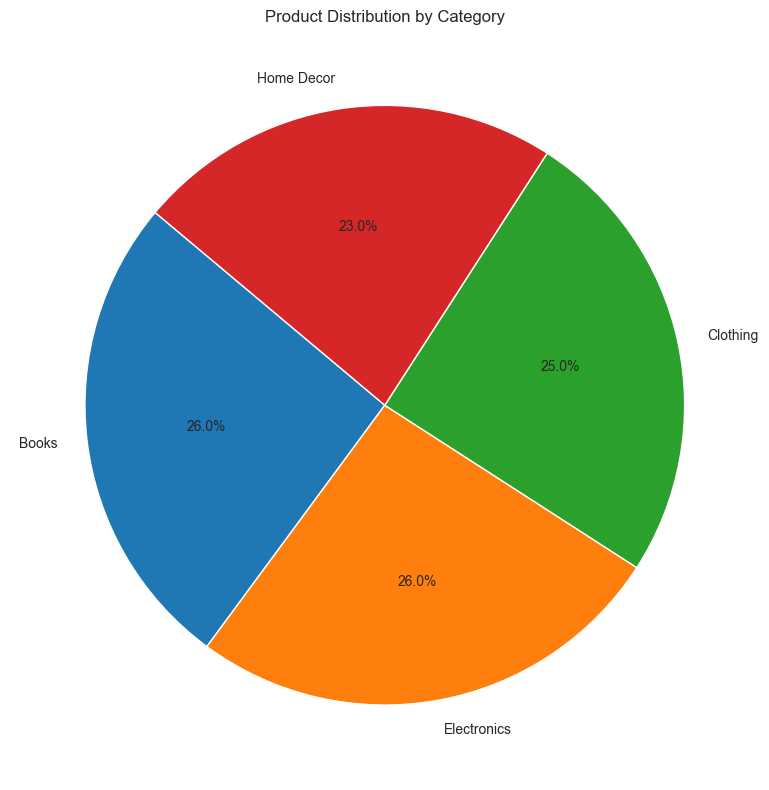

In [101]:
# Pie chart of product categories
plt.figure(figsize=(8,8))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Product Distribution by Category')
plt.tight_layout()
plt.show()

### Insight:
### The product catalog is diverse, with a slight emphasis on Books and Electronics.

### 3.2.6.2 Price Distribution

In [102]:
# Price statistics
print(products['Price'].describe())

count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


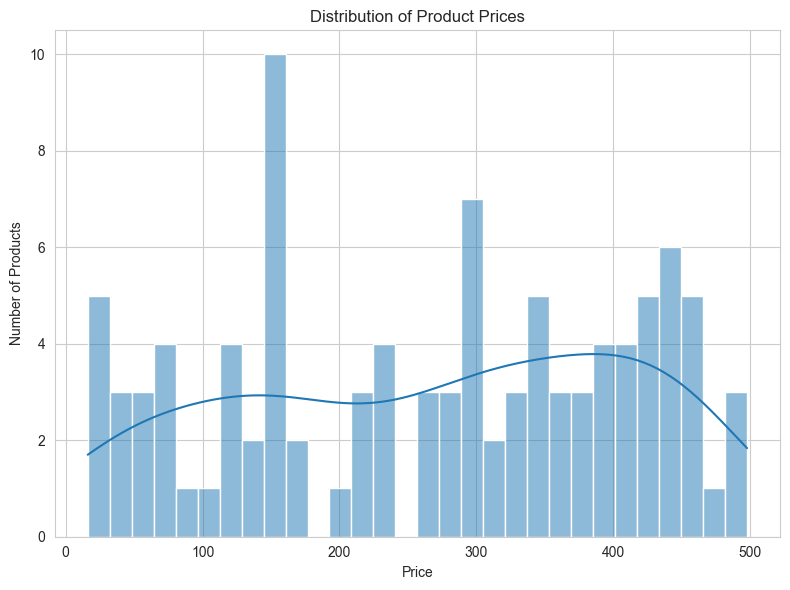

In [103]:
# Histogram of product prices
plt.figure(figsize=(8,6))
sns.histplot(products['Price'], bins=30, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()

Insight:

Product prices range widely, indicating offerings for different customer segments.


3.2.6.3 Price by Category

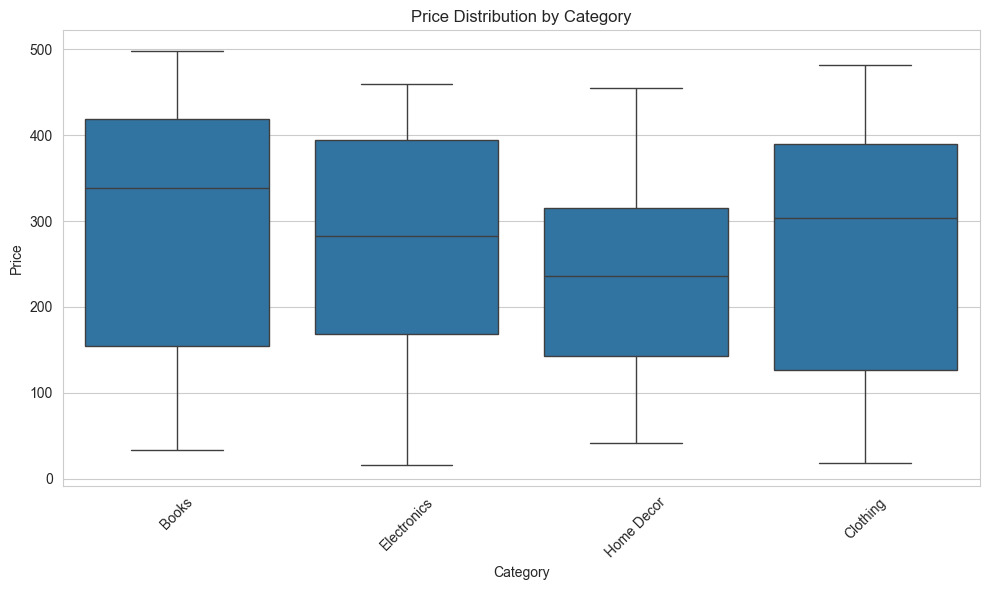

In [104]:
# Boxplot of prices by category
plt.figure(figsize=(10,6))
sns.boxplot(x='Category', y='Price', data=products)
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insight:
### Electronics have the highest median price.
### Books and Clothing show a wide range in pricing.

### 3.2.6.4 Top and Bottom Priced Products

In [105]:
# Top 5 most expensive products
print("Top 5 most expensive products:")
display(products.sort_values(by='Price', ascending=False).head())

# Top 5 least expensive products
print("Top 5 least expensive products:")
display(products.sort_values(by='Price', ascending=True).head())

Top 5 most expensive products:


,ProductID,ProductName,Category,Price
74,P075,TechPro Textbook,Books,497.76
31,P032,BookWorld Cookbook,Books,488.63
44,P045,SoundWave T-Shirt,Clothing,481.78
16,P017,ActiveWear Textbook,Books,469.77
36,P037,SoundWave Smartwatch,Electronics,459.86


Top 5 least expensive products:


,ProductID,ProductName,Category,Price
55,P056,SoundWave Smartwatch,Electronics,16.08
43,P044,ActiveWear Running Shoes,Clothing,18.82
13,P014,ActiveWear Jacket,Clothing,26.26
72,P073,ComfortLiving Laptop,Electronics,26.99
34,P035,ActiveWear T-Shirt,Clothing,30.59


3.3 EDA on Transactions Dataset

3.3.1 Data Overview


In [106]:
# Display first few rows
print("First 5 rows of Transactions dataset:")
display(transactions.head())

First 5 rows of Transactions dataset:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


3.3.2 Data Summary

In [107]:
# Summary statistics
print("Summary statistics of Transactions dataset:")
display(transactions.describe(include='all'))

Summary statistics of Transactions dataset:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.00000
unique,1000,199,100,1000,NaN,NaN,NaN
top,T00001,C0109,P059,2024-08-25 12:38:23,NaN,NaN,NaN
freq,1,11,19,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.537000,689.995560,272.55407
std,NaN,NaN,NaN,NaN,1.117981,493.144478,140.73639
min,NaN,NaN,NaN,NaN,1.000000,16.080000,16.08000
25%,NaN,NaN,NaN,NaN,2.000000,295.295000,147.95000
50%,NaN,NaN,NaN,NaN,3.000000,588.880000,299.93000
75%,NaN,NaN,NaN,NaN,4.000000,1011.660000,404.40000


3.3.3 Missing Values

In [108]:
# Check for missing values
print("Missing values in Transactions dataset:")
print(transactions.isnull().sum())

Missing values in Transactions dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


3.3.4 Data Types

In [109]:
# Check data types
print("Data types in Transactions dataset:")
print(transactions.dtypes)

Data types in Transactions dataset:
TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object


3.3.5 Handling Duplicates

In [110]:
# Check for duplicates
duplicate_transactions = transactions.duplicated(subset='TransactionID').sum()
print(f"Number of duplicate TransactionIDs: {duplicate_transactions}")

Number of duplicate TransactionIDs: 0


3.3.6 Exploratory Analysis

3.3.6.1 Transactions Over Time

In [111]:
# transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], format='%m/%d/%Y %H:%M:%S', errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [112]:
# Extract year and month from 'TransactionDate'
transactions['TransactionYear'] = transactions['TransactionDate'].dt.year
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.month

# Transactions by year
transactions_by_year = transactions['TransactionYear'].value_counts().sort_index()
print(transactions_by_year)

TransactionYear
2023      4
2024    996
Name: count, dtype: int64


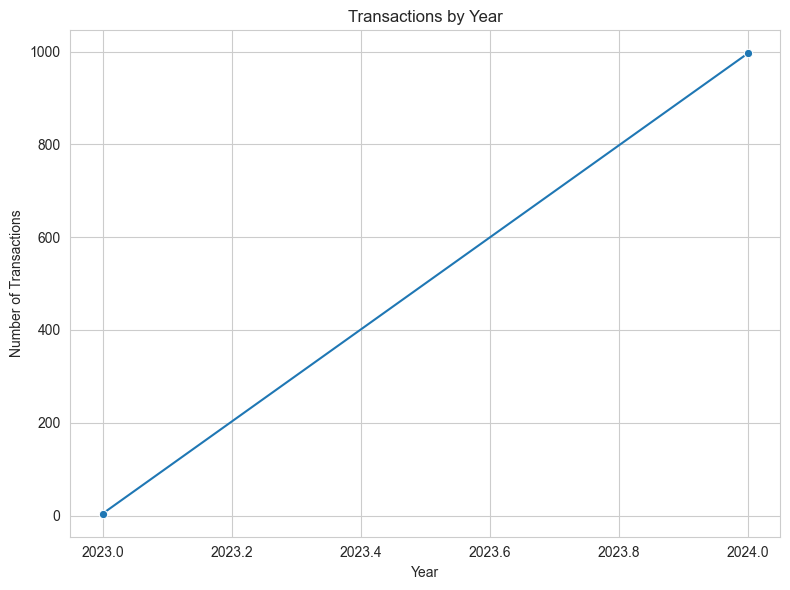

In [113]:
# Line chart of transactions by year
plt.figure(figsize=(8,6))
sns.lineplot(x=transactions_by_year.index, y=transactions_by_year.values, marker='o')
plt.title('Transactions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()

### Insight:
### Transactions are primarily in 2024; consider checking date consistency.

### 3.3.6.2 Monthly Transaction Trends

In [114]:
# Transactions by month
transactions_by_month = transactions['TransactionMonth'].value_counts().sort_index()
print(transactions_by_month)

TransactionMonth
1     107
2      77
3      80
4      86
5      86
6      69
7      96
8      94
9      96
10     70
11     57
12     82
Name: count, dtype: int64


### Visualization:

C:\Users\palut\AppData\Local\Temp\ipykernel_8940\1691067177.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transactions_by_month.index, y=transactions_by_month.values, palette='viridis')


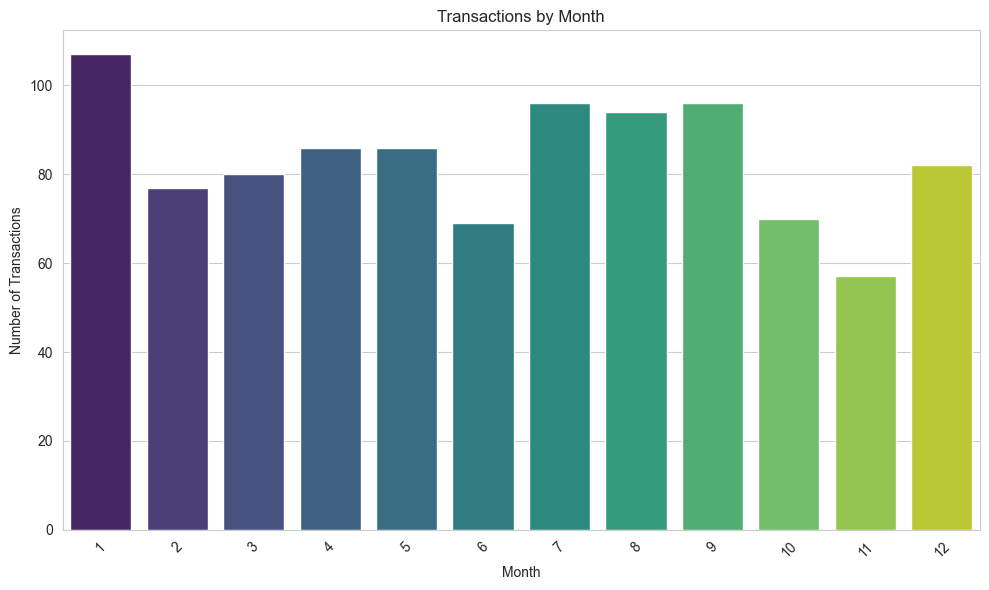

In [115]:
# Bar chart of transactions by month
plt.figure(figsize=(10,6))
sns.barplot(x=transactions_by_month.index, y=transactions_by_month.values, palette='viridis')
plt.title('Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight:

Transactions are spread across months with some variation; identify peak periods.


3.3.6.3 Sales Performance

In [116]:
# Total Revenue
total_revenue = transactions['TotalValue'].sum()
print(f"Total Revenue from Transactions: ${total_revenue:.2f}")

Total Revenue from Transactions: $689995.56


3.3.6.4 Quantity Analysis

In [117]:
# Statistics on Quantity
print(transactions['Quantity'].describe())

count    1000.000000
mean        2.537000
std         1.117981
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Quantity, dtype: float64


Visualization:

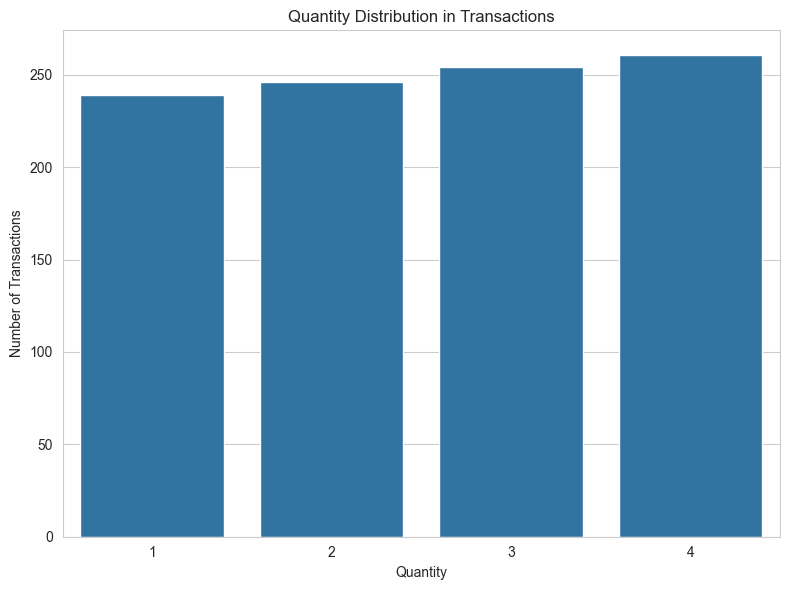

In [118]:
# Histogram of quantities
plt.figure(figsize=(8,6))
sns.countplot(x='Quantity', data=transactions)
plt.title('Quantity Distribution in Transactions')
plt.xlabel('Quantity')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

Insight:

Most transactions involve quantities of 1 to 4.

3.3.6.5 Outlier Detection (Advanced)

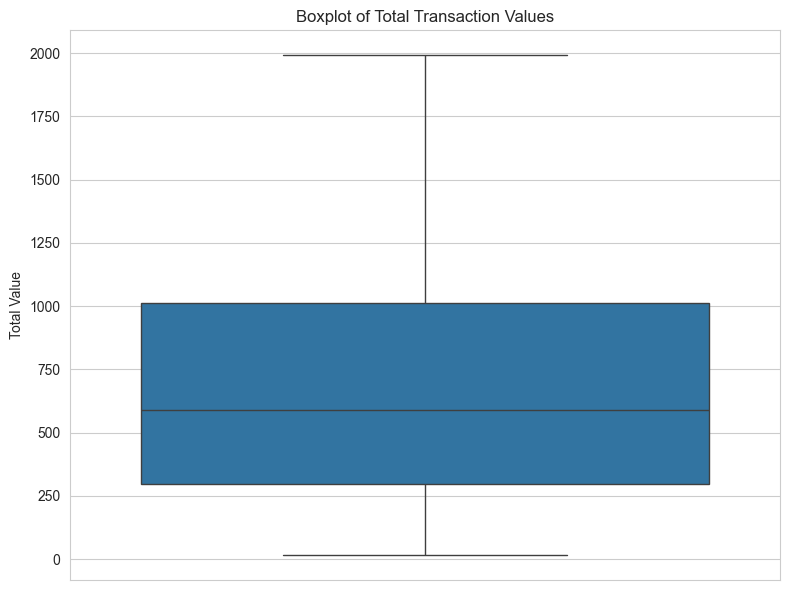

In [119]:
# Boxplot for 'TotalValue'
plt.figure(figsize=(8,6))
sns.boxplot(y='TotalValue', data=transactions)
plt.title('Boxplot of Total Transaction Values')
plt.ylabel('Total Value')
plt.tight_layout()
plt.show()

### Insight:
### Identify transactions with unusually high values for further investigation.

# 4. Merging Datasets

We merge the datasets to perform combined analyses.

In [120]:
# Merge transactions with products
transactions_products = pd.merge(transactions, products, on='ProductID', how='left')

# Merge the result with customers
full_data = pd.merge(transactions_products, customers, on='CustomerID', how='left')

### Ensure data integrity:

In [121]:
# Check for missing values after merge
print(full_data.isnull().sum())

# Drop rows with missing critical information if necessary
full_data.dropna(subset=['TransactionDate', 'ProductName', 'CustomerName'], inplace=True)

TransactionID       0
CustomerID          0
ProductID           0
TransactionDate     0
Quantity            0
TotalValue          0
Price_x             0
TransactionYear     0
TransactionMonth    0
ProductName         0
Category            0
Price_y             0
CustomerName        0
Region              0
SignupDate          0
SignupYear          0
SignupMonth         0
TenureDays          0
dtype: int64


### 5. Combined EDA and Insights

### 5.1 Sales Performance by Product

In [122]:
# Total sales per product
product_sales = full_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
print("Top 10 products by sales:")
print(product_sales.head(10))

Top 10 products by sales:
ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


Visualization:

C:\Users\palut\AppData\Local\Temp\ipykernel_8940\1487334217.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='Blues_d')


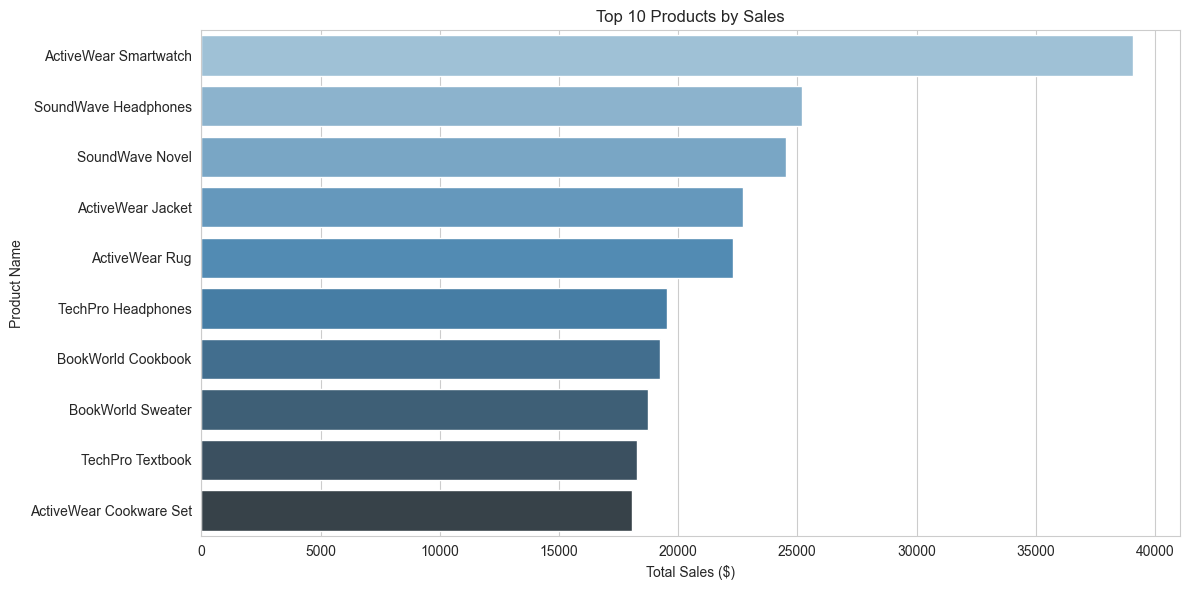

In [123]:
# Bar chart of top 10 products by sales
plt.figure(figsize=(12,6))
top_products = product_sales.head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='Blues_d')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

In [124]:
# Average transaction value
average_transaction_value = transactions['TotalValue'].mean()
print(f'Average Transaction Value: ${average_transaction_value:.2f}')

Average Transaction Value: $690.00


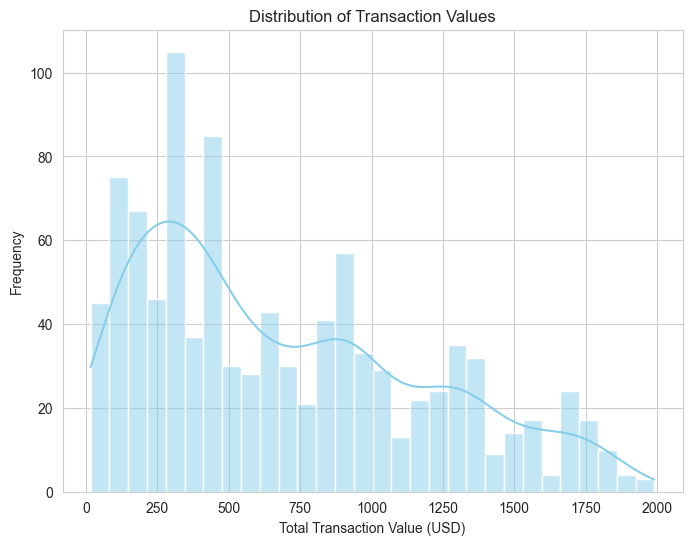

In [125]:
# Plotting distribution
plt.figure(figsize=(8,6))
sns.histplot(transactions['TotalValue'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Transaction Values')
plt.xlabel('Total Transaction Value (USD)')
plt.ylabel('Frequency')
plt.show()

In [126]:
# # Number of transactions per day
# daily_transaction_counts = transactions.groupby('TransactionDateOnly')['TransactionID'].count()

# # Plotting
# plt.figure(figsize=(14,6))
# daily_transaction_counts.plot()
# plt.title('Daily Number of Transactions')
# plt.xlabel('Date')
# plt.ylabel('Number of Transactions')
# plt.show()

# Correlation matrix
correlation_matrix = transactions[numeric_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()


NameError: name 'numeric_columns' is not defined

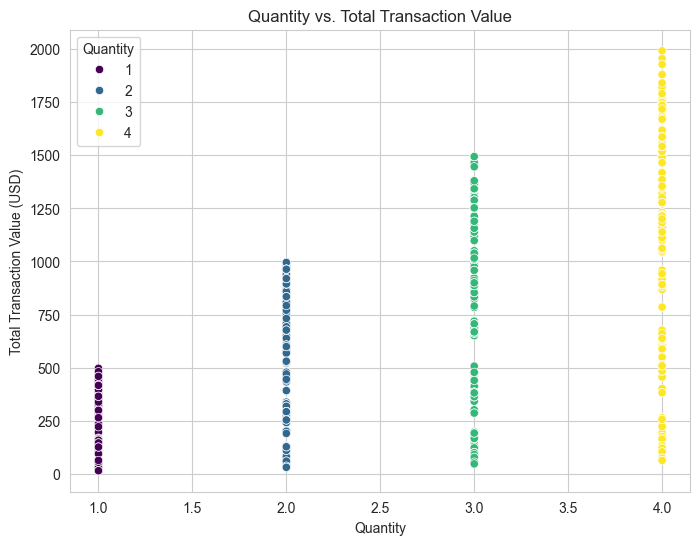

In [127]:
# Plotting relationship between Quantity and TotalValue
plt.figure(figsize=(8,6))
sns.scatterplot(data=transactions, x='Quantity', y='TotalValue', hue='Quantity', palette='viridis')
plt.title('Quantity vs. Total Transaction Value')
plt.xlabel('Quantity')
plt.ylabel('Total Transaction Value (USD)')
plt.show()

Insight:

Specific products are driving significant revenue; consider focusing marketing efforts on them.

5.2 Customer Lifetime Value (CLV) Analysis

Feature Engineering:

In [128]:
# Calculate total spending per customer
customer_spending = full_data.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_spending.columns = ['CustomerID', 'TotalSpending']

# Merge with customers data
customers_clv = pd.merge(customers, customer_spending, on='CustomerID', how='left')
customers_clv['TotalSpending'].fillna(0, inplace=True)

Visualization:

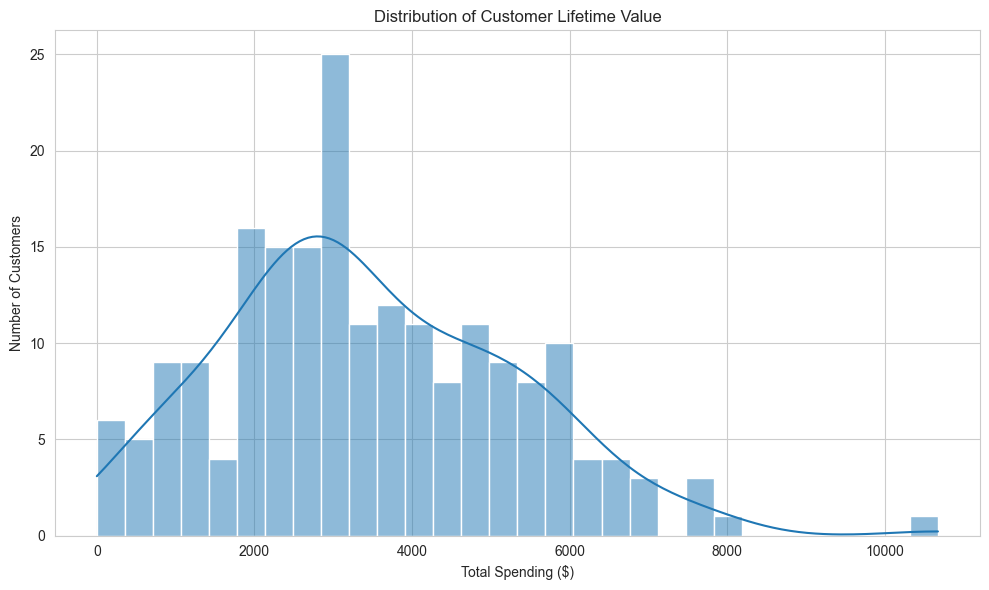

In [129]:
# Histogram of total spending
plt.figure(figsize=(10,6))
sns.histplot(customers_clv['TotalSpending'], bins=30, kde=True)
plt.title('Distribution of Customer Lifetime Value')
plt.xlabel('Total Spending ($)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

Insight:

Most customers have moderate CLV; identify and nurture high-value customers.

5.3 Sales by Region

In [130]:
# Total sales by region
region_sales = full_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(region_sales)

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


Visualization:

C:\Users\palut\AppData\Local\Temp\ipykernel_8940\3612795195.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.values, y=region_sales.index, palette='Greens_d')


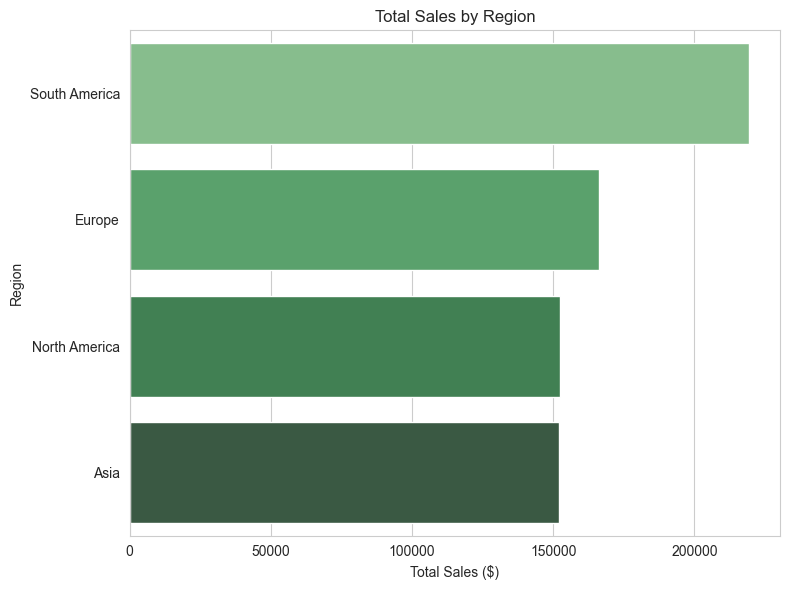

In [131]:
# Bar chart of sales by region
plt.figure(figsize=(8,6))
sns.barplot(x=region_sales.values, y=region_sales.index, palette='Greens_d')
plt.title('Total Sales by Region')
plt.xlabel('Total Sales ($)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

### Insight:
### South America generates the highest sales, aligning with customer distribution.

### 5.4 Product Preference by Region (Advanced)

In [132]:
# Top products by region
region_product_sales = full_data.groupby(['Region', 'ProductName'])['TotalValue'].sum().reset_index()

# Get top product per region
top_product_per_region = region_product_sales.loc[region_product_sales.groupby('Region')['TotalValue'].idxmax()]
print(top_product_per_region)

            Region            ProductName  TotalValue
20            Asia      BookWorld Sweater     7266.20
76          Europe     BookWorld Cookbook     8360.56
132  North America  ActiveWear Smartwatch    10080.99
196  South America  ActiveWear Smartwatch    14226.61


Insight:

Identifying top products in each region helps tailor regional marketing strategies.

5.5 Time Series Analysis of Sales

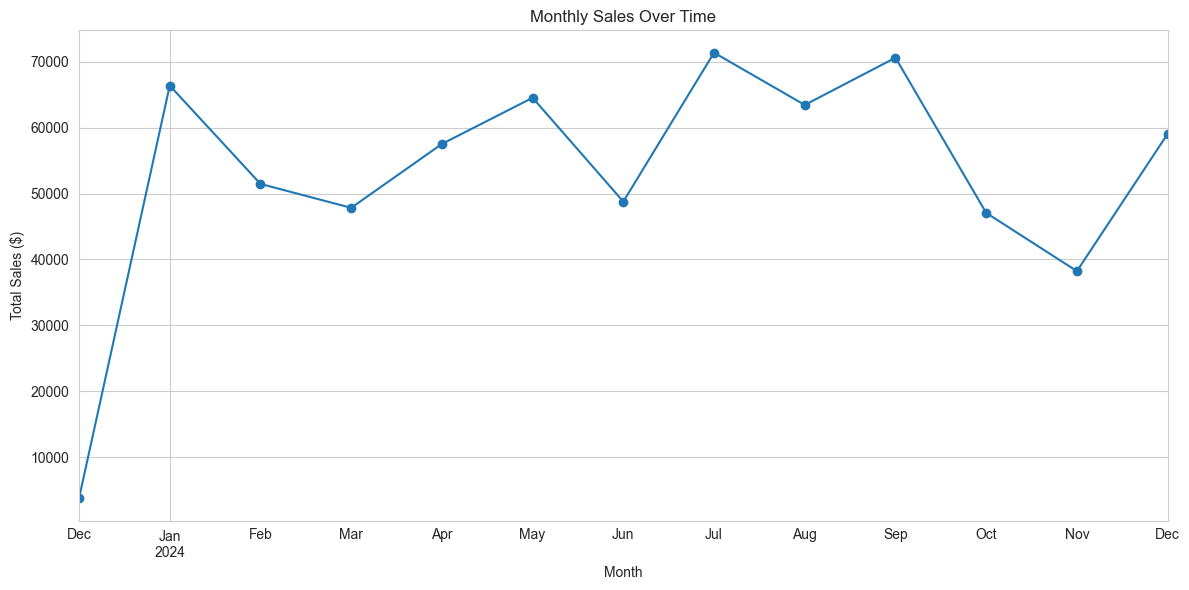

In [133]:
# Set 'TransactionDate' as index
full_data.set_index('TransactionDate', inplace=True)

# Resample data to get monthly sales
monthly_sales = full_data['TotalValue'].resample('M').sum()

# Plot monthly sales
plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

5.6 Cohort Analysis (Advanced)

Creating Cohorts:

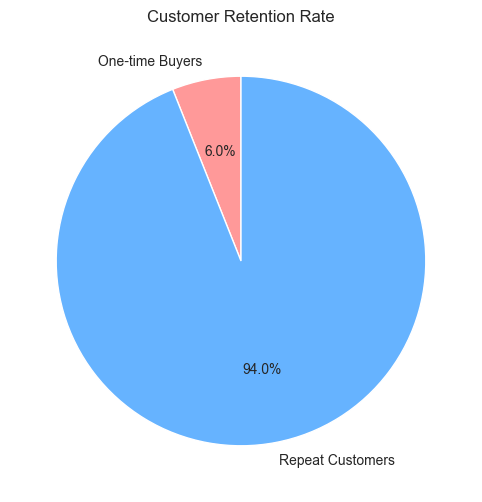

In [134]:
# Customer Retention Visualization
customer_purchases = full_data.groupby('CustomerID')['TransactionID'].nunique()
repeat_customers = customer_purchases[customer_purchases > 1]
repeat_customer_percentage = (len(repeat_customers) / len(customer_purchases)) * 100

plt.figure(figsize=(8, 6))
labels = ['One-time Buyers', 'Repeat Customers']
sizes = [100 - repeat_customer_percentage, repeat_customer_percentage]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Customer Retention Rate')
plt.savefig('retention_rate.png', bbox_inches='tight')
plt.show()

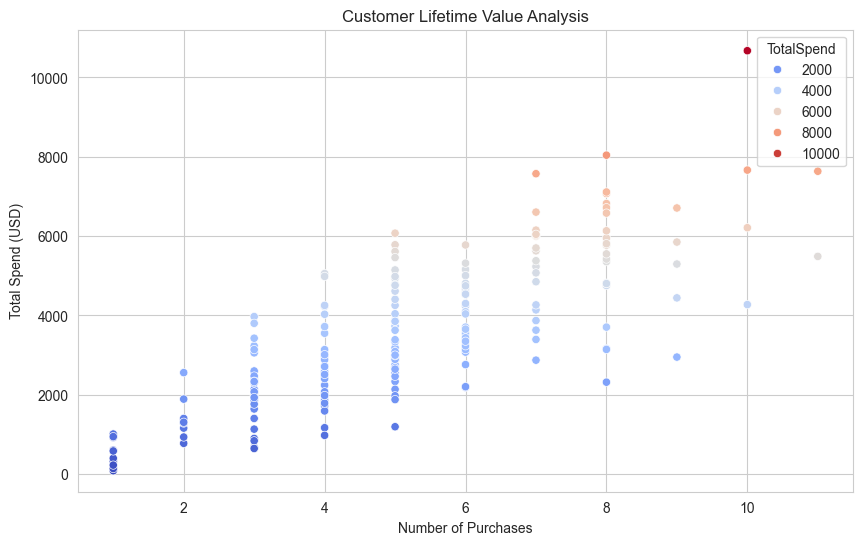

In [135]:
customer_lifetime = full_data.groupby('CustomerID').agg(
    TotalSpend=('TotalValue', 'sum'),
    PurchaseFrequency=('TransactionID', 'nunique')
).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PurchaseFrequency', y='TotalSpend', data=customer_lifetime, hue='TotalSpend', palette='coolwarm')
plt.title('Customer Lifetime Value Analysis')
plt.xlabel('Number of Purchases')
plt.ylabel('Total Spend (USD)')
plt.savefig('customer_lifetime.png', bbox_inches='tight')
plt.show()

In [136]:
# Assign cohort based on customer's first purchase month
full_data.reset_index(inplace=True)
full_data['CohortMonth'] = full_data.groupby('CustomerID')['TransactionDate'].transform('min').dt.to_period('M')

# Set index back to 'TransactionDate'
full_data.set_index('TransactionDate', inplace=True)

Calculating Retention:

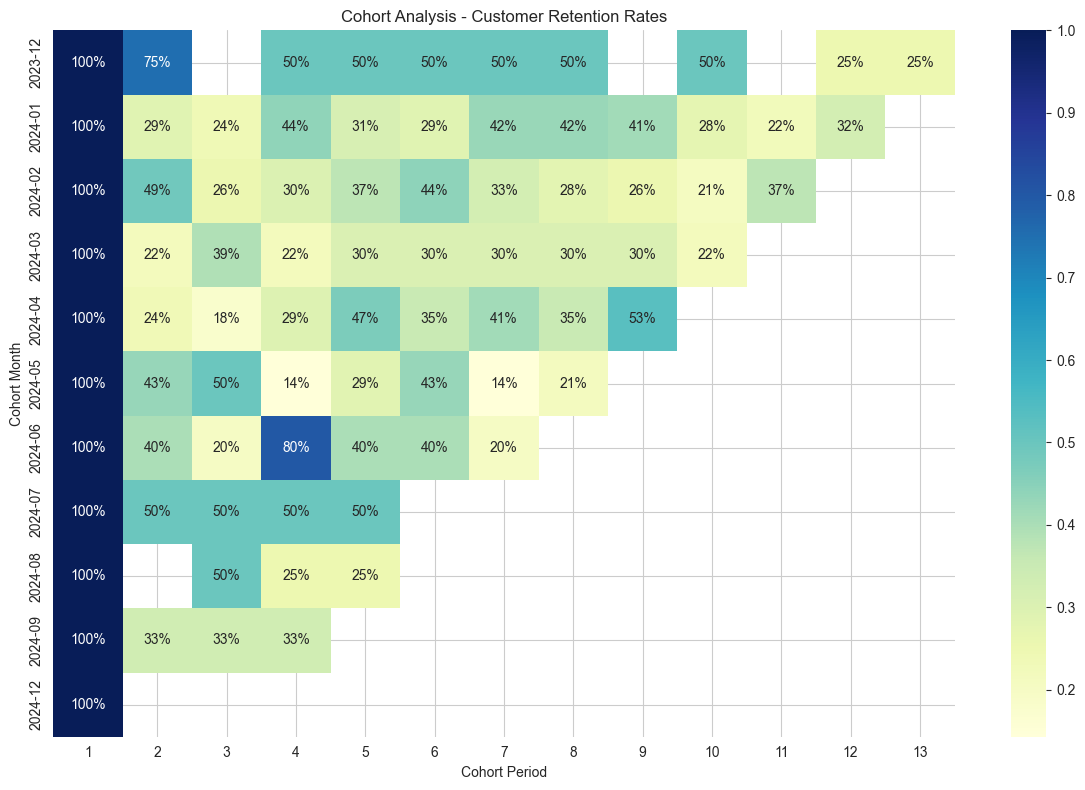

In [137]:
from operator import attrgetter

# Assuming 'full_data' DataFrame is already prepared and 'TransactionDate' is in datetime format

# Step 1: Reset index if necessary
full_data = full_data.reset_index()

# Step 2: Create 'TransactionMonth' and 'CohortMonth'
full_data['TransactionMonth'] = full_data['TransactionDate'].dt.to_period('M')
full_data['CohortMonth'] = full_data.groupby('CustomerID')['TransactionDate'].transform('min').dt.to_period('M')

# Step 3: Calculate 'CohortPeriod'
full_data['CohortPeriod'] = (full_data['TransactionMonth'] - full_data['CohortMonth']).apply(attrgetter('n')) + 1

# Step 4: Group by 'CohortMonth' and 'CohortPeriod'
cohort_group = full_data.groupby(['CohortMonth', 'CohortPeriod']).agg({'CustomerID': 'nunique'}).reset_index()
cohort_group.rename(columns={'CustomerID': 'NumCustomers'}, inplace=True)

# Step 5: Create the cohort table
cohort_table = cohort_group.pivot(index='CohortMonth', columns='CohortPeriod', values='NumCustomers')

# Step 6: Calculate retention rates
cohort_sizes = cohort_table.iloc[:, 0]
retention = cohort_table.divide(cohort_sizes, axis=0)

# Step 7: Visualize retention rates
plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt=".0%", cmap="YlGnBu")
plt.title('Cohort Analysis - Customer Retention Rates')
plt.xlabel('Cohort Period')
plt.ylabel('Cohort Month')
plt.tight_layout()
plt.show()

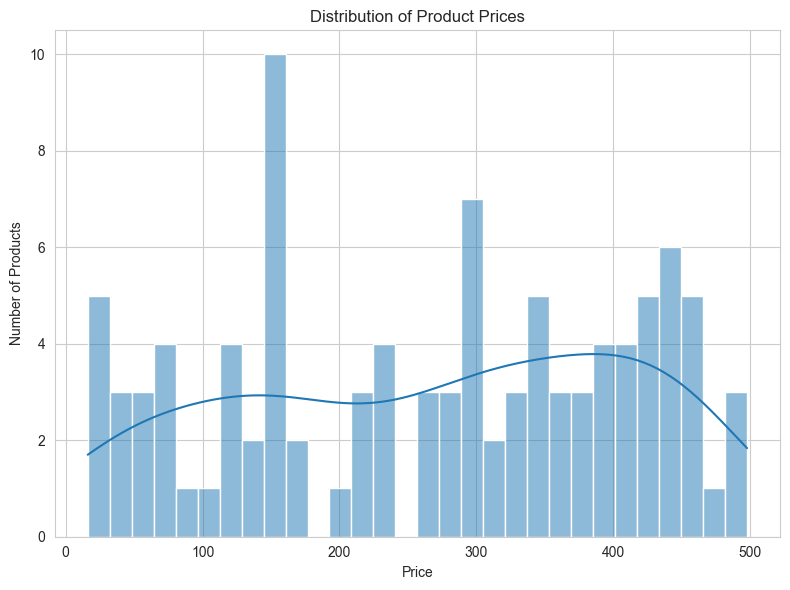

In [138]:
# Histogram of Product Prices
plt.figure(figsize=(8,6))
sns.histplot(products['Price'], bins=30, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()

Insight:

Cohort analysis reveals customer retention patterns over time

C:\Users\palut\AppData\Local\Temp\ipykernel_8940\1830422326.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=customers, palette='viridis')


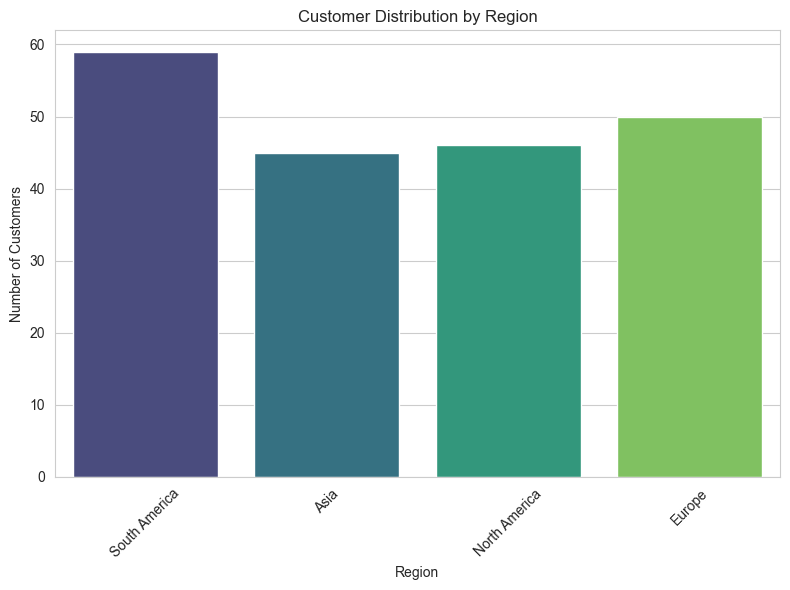

In [139]:
# Bar chart of Customers by Region
plt.figure(figsize=(8,6))
sns.countplot(x='Region', data=customers, palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

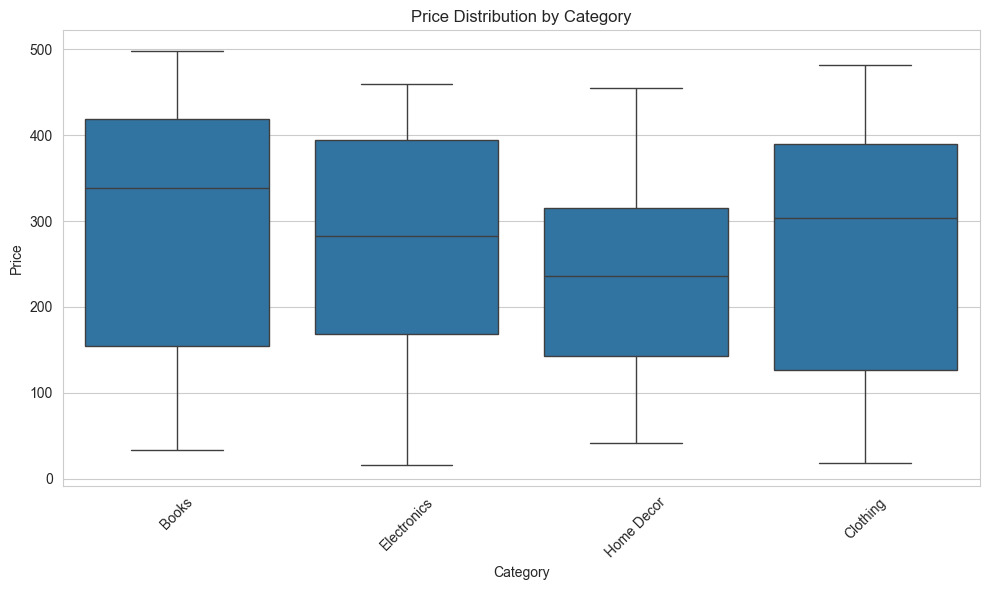

In [140]:
# Boxplot of Price by Category in Products
plt.figure(figsize=(10,6))
sns.boxplot(x='Category', y='Price', data=products)
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

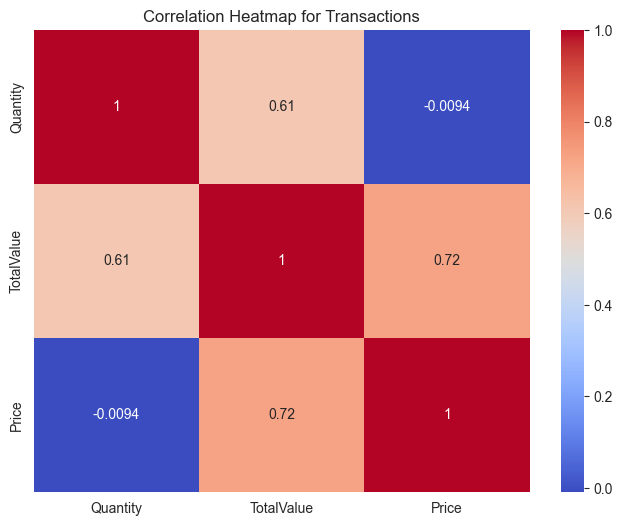

In [141]:
# Correlation matrix for Transactions
corr = transactions[['Quantity', 'TotalValue', 'Price']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Transactions')
plt.show()

5.7 Market Basket Analysis (Association Rules)

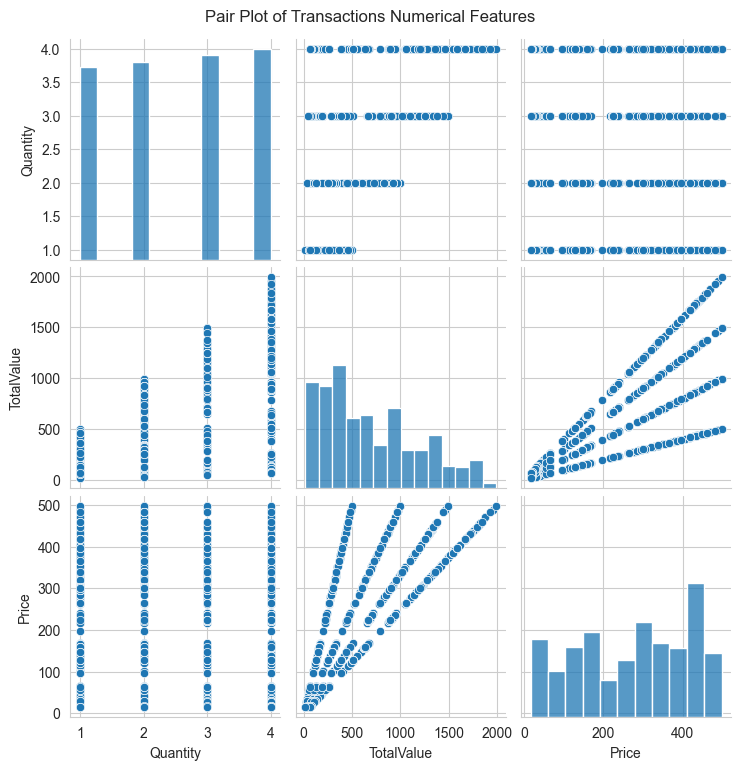

In [142]:
# Pair plot of numerical features in Transactions
sns.pairplot(transactions[['Quantity', 'TotalValue', 'Price']])
plt.suptitle('Pair Plot of Transactions Numerical Features', y=1.02)
plt.show()